In [ ]:
pip install pulp


     |████████████████████████████████| 40.6MB 102kB/s 


In [ ]:
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, value
import csv
import pandas as pd
import numpy as np

In [ ]:
pip install pydrive

In [ ]:
pip install xlrd

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
from scipy.optimize import fmin_slsqp
import os
import matplotlib.pyplot as plt
#import seaborn as sns
import seaborn as sns
from pprint import pprint
import random

#Listing the existing files in the dir
for root, dirs, files in os.walk("."):  
    for filename in files:
        print(filename)

novotfmvino - Hoja 1 (2).csv
.last_update_check.json
config_sentinel
gce
active_config
.last_opt_in_prompt.yaml
.last_survey_prompt.yaml
config_default
13.38.33.645732.log
13.38.39.238346.log
13.38.56.174593.log
13.37.59.675948.log
13.38.18.505216.log
13.38.55.616588.log
anscombe.json
README.md
california_housing_test.csv
mnist_test.csv
mnist_train_small.csv
california_housing_train.csv


In [ ]:
df = pd.read_csv('/content/novotfmvino - Hoja 1 (2).csv', header=0, decimal=',')
df

,País,y1,y2,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,Reino Unido,266029,94668,5.555556,12.710000,9.4,91.58,11.76,2829000,66650,0.125000,0.000792,207,18900.0,16782
1,Estados Unidos,246950,44991,4.761905,23.630000,5.7,88.56,17.24,21430000,328200,0.166667,0.000173,180,23458.0,32900
2,Alemania,213792,84713,3.703704,31.108434,12.6,89.85,7.98,3861000,83020,0.045455,0.000167,60,1180.0,20276
3,Suiza,112855,14561,4.000000,29.240964,13.8,88.57,10.62,703000,8545,0.027778,0.000802,74,1871.0,2820
4,Países Bajos,98705,40163,7.692308,9.542169,9.0,89.19,5.98,907100,17280,0.023810,0.000675,100,1408.0,11413
5,Canada,96767,20382,6.250000,24.300000,6.0,89.36,29.35,1736000,37590,0.043478,0.000166,74,5640.0,10911
6,Mexico,66073,17757,4.761905,24.050000,34.5,85.25,23.67,1269000,127600,0.016667,0.000110,154,3070.0,5198
7,Francia,63390,50990,7.692308,12.674699,10.3,88.84,13.15,2716000,67060,0.031250,0.000951,188,38977.0,6414
8,Portugal,45762,92583,2.564103,14.879518,58.3,88.25,28.16,238800,10280,0.025641,0.001605,26,6400.0,4403
9,Bélgica,38330,11317,3.030303,9.192771,5.7,90.40,9.00,533100,11460,0.021739,0.000636,44,5179.0,6716


In [ ]:
df = df.drop(df.loc[:,['País']].head(0).columns, axis=1)

In [ ]:
df = df.drop(['x2', 'x11'],axis=1)
df

,y1,y2,x1,x3,x4,x5,x6,x7,x8,x9,x10,x12
0,266029,94668,5.555556,9.4,91.58,11.76,2829000,66650,0.125000,0.000792,207,16782
1,246950,44991,4.761905,5.7,88.56,17.24,21430000,328200,0.166667,0.000173,180,32900
2,213792,84713,3.703704,12.6,89.85,7.98,3861000,83020,0.045455,0.000167,60,20276
3,112855,14561,4.000000,13.8,88.57,10.62,703000,8545,0.027778,0.000802,74,2820
4,98705,40163,7.692308,9.0,89.19,5.98,907100,17280,0.023810,0.000675,100,11413
5,96767,20382,6.250000,6.0,89.36,29.35,1736000,37590,0.043478,0.000166,74,10911
6,66073,17757,4.761905,34.5,85.25,23.67,1269000,127600,0.016667,0.000110,154,5198
7,63390,50990,7.692308,10.3,88.84,13.15,2716000,67060,0.031250,0.000951,188,6414
8,45762,92583,2.564103,58.3,88.25,28.16,238800,10280,0.025641,0.001605,26,4403
9,38330,11317,3.030303,5.7,90.40,9.00,533100,11460,0.021739,0.000636,44,6716


In [ ]:
import numpy as np
from scipy.optimize import linprog
from pulp import *
import pandas as pd

dados = pd.read_csv("/content/novotfmvino - Hoja 1 (2).csv", decimal= ",", header=0)


#retiramos as variáveis que não serão usadas.

dados = dados.drop(['x2', 'x11'],axis=1)





print(dados)


          

               País      y1     y2        x1  ...        x8        x9  x10    x12
0       Reino Unido  266029  94668  5.555556  ...  0.125000  0.000792  207  16782
1    Estados Unidos  246950  44991  4.761905  ...  0.166667  0.000173  180  32900
2          Alemania  213792  84713  3.703704  ...  0.045455  0.000167   60  20276
3             Suiza  112855  14561  4.000000  ...  0.027778  0.000802   74   2820
4      Países Bajos   98705  40163  7.692308  ...  0.023810  0.000675  100  11413
5            Canada   96767  20382  6.250000  ...  0.043478  0.000166   74  10911
6            Mexico   66073  17757  4.761905  ...  0.016667  0.000110  154   5198
7           Francia   63390  50990  7.692308  ...  0.031250  0.000951  188   6414
8          Portugal   45762  92583  2.564103  ...  0.025641  0.001605   26   4403
9           Bélgica   38330  11317  3.030303  ...  0.021739  0.000636   44   6716
10           Suecia   36080   9325  6.250000  ...  0.100000  0.000319   26   2820
11          Leto

In [ ]:
conj = np.array(dados[['y1', 'y2', 'x3', 'x4', 'x6', 'x9', 'x10', 'x12']])

#função que resolve o problema de maximização e retorna os valores da função objetivo e #dos pesos
def DEA(dados,i):
    prob = LpProblem("DEA", LpMaximize)
    u = LpVariable('u',0, None)
    v = LpVariable('v',0, None)
    prob += u*dados[i][2]
    prob += v*dados[i][2] == 1
    for j in range(0, len(dados)):
        prob += u*dados[j][3] <= v*dados[j][2] 

    prob.solve()
    return [dados[i][0:1], dados[i][2:6]*u.varValue, u.varValue, v.varValue]

resultado = []
#calculando os valores para todos os bancos
for i in range(0, len(conj)):
    resultado.append(DEA(conj, i))

print(resultado)


[['Reino Unido', 266029.0, 6591.5750922, 0.0023300018, 0.10638298], 
 ['Portugal', 246950.0, 82343.900656, 0.0038424592, 0.1754386], 
 ['Alemania', 213792.0, 6711.4037133, 0.0017382553, 0.079365079], 
 ['Suiza', 112855.0, 1115.7331981, 0.0015871027, 0.072463768], 
 ['Nueva Zelanda', 98705.0, 2207.48000825, 0.0024335575, 0.11111111], 
 ['Lituania', 96767.0, 6336.9836432, 0.0036503362, 0.16666667], 
 ['Croacia', 66073.0, 805.6133305200001, 0.00063484108, 0.028985507], 
 ['Hungría', 63390.0, 5775.3279304, 0.0021264094, 0.097087379], 
 ['Croacia', 45762.0, 89.711865804, 0.00037567783, 0.017152659], 
 ['Argentina', 38330.0, 2048.41499952, 0.0038424592, 0.1754386], 
 ['Uruguay', 36080.0, 1211.22716709, 0.0022814601, 0.10416667], 
 ['República Checa', 24079.0, 48.18443894, 0.0014130334, 0.064516129], 
 ['Perú', 18138.0, 8059.942440000001, 0.0043804035, 0.2], 
 ['Estados Unidos', 16645.0, 54.38669109120001, 0.00099554624, 0.045454545], 
 ['Suecia', 16222.0, 2498.8878, 0.001469934, 0.067114094], 
 ['Sudáfrica', 11090.0, 831.94481625, 0.0033184875, 0.15151515], 
 ['Eslovenia', 9807.0, 8269.4913477, 0.0059194641, 0.27027027], 
 ['Serbia', 8763.0, 4295.37210264, 0.0021472566, 0.098039216], 
 ['Rusia', 6894.0, 1095.34694608, 0.0024609008, 0.11235955], 
 ['Rumanía', 5449.0, 269.96616359999996, 0.001190327, 0.054347826], 
 ['Países Bajos', 1847.0, 1372.17877329, 0.0034765107, 0.15873016], 
 ['México', 1770.0, 829.95372375, 0.0033184875, 0.15151515], 
 ['Letonia', 1726.0, 1618.4026281000001, 0.007822149, 0.35714286], 
 ['Italia', 1389.0, 920.7608051899999, 0.0087608069, 0.4], 
 ['Israel', 934.0, 587.0458671, 0.0035904946, 0.16393443], 
 ['India', 857.0, 228.997759809, 0.00081118583, 0.037037037], 
 ['Francia', 763.0, 417.598465284, 0.0081118583, 0.37037037], 
 ['Eslovaquia', 674.0, 16982.942502899998, 0.0059194641, 0.27027027], 
 ['Chile', 524.0, 646.1095369, 0.011527378, 0.52631579], 
 ['Canadá', 472.0, 1673.12366634, 0.0047613081, 0.2173913], 
 ['Brasil', 435.0, 511.7659053056, 0.0084238528, 0.38461538], 
 ['Bélgica', 220.0, 494.38328324699995, 0.0091258405, 0.41666667], 
 ['Austria', 160.0, 855.802119172, 0.0019212296, 0.087719298]]



[[array([266029.]), array([2.19020169e-02, 2.13381565e-01, 6.59157509e+03, 1.84481536e-06]), 0.0023300018, 0.10638298], [array([246950.]), array([2.19020174e-02, 3.40288187e-01, 8.23439007e+04, 6.66168377e-07]), 0.0038424592, 0.1754386], [array([213792.]), array([2.19020168e-02, 1.56182239e-01, 6.71140371e+03, 2.90483840e-07]), 0.0017382553, 0.079365079], [array([112855.]), array([2.19020173e-02, 1.40569686e-01, 1.11573320e+03, 1.27273673e-06]), 0.0015871027, 0.072463768], [array([98705.]), array([2.19020175e-02, 2.17048993e-01, 2.20748001e+03, 1.64318535e-06]), 0.0024335575, 0.11111111], [array([96767.]), array([2.19020172e-02, 3.26194043e-01, 6.33698364e+03, 6.05161837e-07]), 0.0036503362, 0.16666667], [array([66073.]), array([2.19020173e-02, 5.41202021e-02, 8.05613331e+02, 7.00939693e-08]), 0.00063484108, 0.028985507], [array([63390.]), array([2.19020168e-02, 1.88910211e-01, 5.77532793e+03, 2.02130171e-06]), 0.0021264094, 0.097087379], [array([45762.]), array([2.19020175e-02, 3.3153

[['Reino Unido', 266029.0, 6591.5750922, 0.0023300018, 0.10638298],
 ['Portugal', 246950.0, 82343.900656, 0.0038424592, 0.1754386],
 ['Alemania', 213792.0, 6711.4037133, 0.0017382553, 0.079365079],
 ['Suiza', 112855.0, 1115.7331981, 0.0015871027, 0.072463768],
 ['Nueva Zelanda', 98705.0, 2207.48000825, 0.0024335575, 0.11111111],
 ['Lituania', 96767.0, 6336.9836432, 0.0036503362, 0.16666667],
 ['Croacia', 66073.0, 805.6133305200001, 0.00063484108, 0.028985507],
 ['Hungría', 63390.0, 5775.3279304, 0.0021264094, 0.097087379],
 ['Croacia', 45762.0, 89.711865804, 0.00037567783, 0.017152659],
 ['Argentina', 38330.0, 2048.41499952, 0.0038424592, 0.1754386],
 ['Uruguay', 36080.0, 1211.22716709, 0.0022814601, 0.10416667],
 ['República Checa', 24079.0, 48.18443894, 0.0014130334, 0.064516129],
 ['Perú', 18138.0, 8059.942440000001, 0.0043804035, 0.2],
 ['Estados Unidos', 16645.0, 54.38669109120001, 0.00099554624, 0.045454545],
 ['Suecia', 16222.0, 2498.8878, 0.001469934, 0.067114094],
 ['Sudáfrica

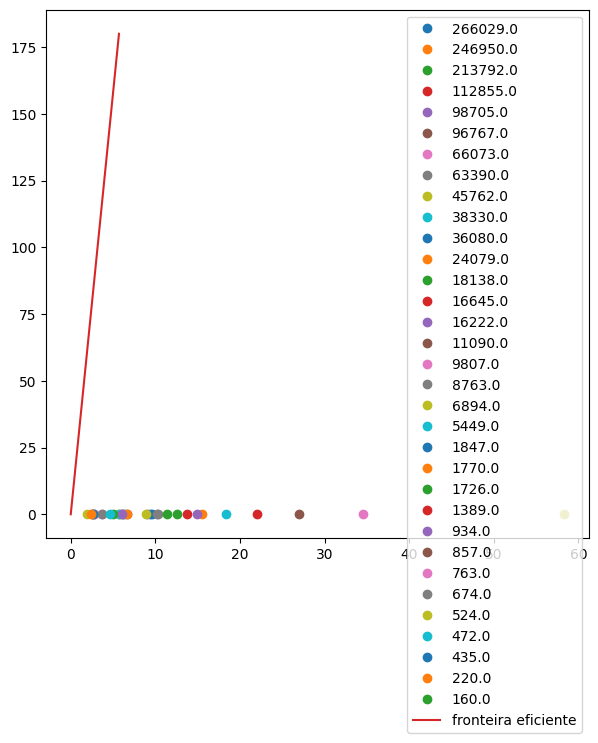

In [ ]:
fig = plt.figure(1, figsize=(7,7 ), frameon=False, dpi=100)
ax = plt.gca()

for i in range(0, len(conj)):
    plt.plot(conj[i][2], conj[i][5], 'o', label = conj[i][0])

plt.plot([conj[1][2], 0], [conj[1][6], 0], label = 'fronteira eficiente')

plt.legend()

plt.savefig('fronteira_eficiente')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/tfm vino all - Hoja 1.csv', header=0, decimal=',')
df

,País,FMi,COiii,FMii,Di,COi,EPiii,COiv,FMiii,EPii,EPi,COii,Dii,Diii,COv,covi,covii
0,Reino Unido,266029,9.4,94668,0.000792,5.555556,0.125000,91.58,16782,66650,2829000,12.710000,207,18900.0,11.76,0.009311,0.010063
1,Estados Unidos,246950,5.7,44991,0.000173,4.761905,0.166667,88.56,32900,328200,21430000,23.630000,180,23458.0,17.24,0.002942,0.004032
2,Alemania,213792,12.6,84713,0.000167,3.703704,0.045455,89.85,20276,83020,3861000,31.108434,60,1180.0,7.98,0.001334,0.005199
3,Suiza,112855,13.8,14561,0.000802,4.000000,0.027778,88.57,2820,8545,703000,29.240964,74,1871.0,10.62,0.007471,0.020569
4,Países Bajos,98705,9.0,40163,0.000675,7.692308,0.023810,89.19,11413,17280,907100,9.542169,100,1408.0,5.98,0.004038,0.006443
5,Canada,96767,6.0,20382,0.000166,6.250000,0.043478,89.36,10911,37590,1736000,24.300000,74,5640.0,29.35,0.004866,0.004029
6,Mexico,66073,34.5,17757,0.000110,4.761905,0.016667,85.25,5198,127600,1269000,24.050000,154,3070.0,23.67,0.002613,0.002655
7,Francia,63390,10.3,50990,0.000951,7.692308,0.031250,88.84,6414,67060,2716000,12.674699,188,38977.0,13.15,0.012500,0.012048
8,Portugal,45762,58.3,92583,0.001605,2.564103,0.025641,88.25,4403,10280,238800,14.879518,26,6400.0,28.16,0.045201,0.023884
9,Bélgica,38330,5.7,11317,0.000636,3.030303,0.021739,90.40,6716,11460,533100,9.192771,44,5179.0,9.00,0.005725,0.005848


In [ ]:
df.corr()

,FMi,COiii,FMii,Di,COi,EPiii,COiv,FMiii,EPii,EPi,COii,Dii,Diii,COv,covi,covii
FMi,1.000000,0.071541,0.786734,0.206871,0.093146,0.038856,0.399397,0.920073,0.044530,0.643767,-0.056278,0.506307,0.385843,-0.141987,0.042190,0.211592
COiii,0.071541,1.000000,0.448078,0.469703,-0.190201,-0.134370,-0.156087,0.017049,-0.109734,-0.092428,-0.128899,0.145519,-0.069698,-0.029913,0.556678,0.460290
FMii,0.786734,0.448078,1.000000,0.595062,0.040588,-0.017319,0.398513,0.685550,-0.028635,0.330704,-0.170822,0.393309,0.402162,-0.115586,0.478400,0.444277
Di,0.206871,0.469703,0.595062,1.000000,0.165102,-0.167246,0.316403,0.089794,-0.187268,-0.099398,-0.282758,0.077191,0.266308,-0.150901,0.749280,0.715824
COi,0.093146,-0.190201,0.040588,0.165102,1.000000,-0.242362,0.004087,0.098774,0.036947,0.009249,0.014527,-0.006494,0.118378,-0.068358,-0.081104,0.038352
EPiii,0.038856,-0.134370,-0.017319,-0.167246,-0.242362,1.000000,0.083790,0.055668,-0.055205,0.078395,-0.043309,-0.020499,0.339738,-0.092365,-0.119388,-0.128782
COiv,0.399397,-0.156087,0.398513,0.316403,0.004087,0.083790,1.000000,0.345872,0.190569,0.166508,-0.128038,0.066060,0.259644,0.042941,0.114190,0.175971
FMiii,0.920073,0.017049,0.685550,0.089794,0.098774,0.055668,0.345872,1.000000,0.085464,0.824938,-0.056433,0.462684,0.413818,-0.132693,-0.008934,0.079522
EPii,0.044530,-0.109734,-0.028635,-0.187268,0.036947,-0.055205,0.190569,0.085464,1.000000,0.297671,0.386458,-0.041280,0.370363,0.813608,0.052812,-0.087789
EPi,0.643767,-0.092428,0.330704,-0.099398,0.009249,0.078395,0.166508,0.824938,0.297671,1.000000,0.078789,0.383784,0.492209,0.054726,-0.064385,-0.039066
